# Machine Learning Day1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
computer_data = pd.read_csv("Z:/datasets/computers.csv")

In [5]:
computer_data

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


# Units indicates the no. of faulty components in a computer
#Minutes indicates the time taken to replace those components

Outliers are either less than Q1 - 1.5IQR  or greater than Q3 + 1.5IQR where IQR = Q3 - Q1

In [6]:
computer_data.describe()

,Units,Minutes
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


Median of minutes = 96.5, Mean of Minutes = 97.21

Imagine data did not have units
Can you predict how much time will it take for a new instance of computer repair?

In [12]:
# 3 estimates
est1 = 10
est2 = 97.21
est3 = 150

In [21]:
# what is the quality matrix that can say which estimate is better?
# difference between estimated time and actual time?
(est1 - computer_data["Minutes"]).mean()

-87.21428571428571

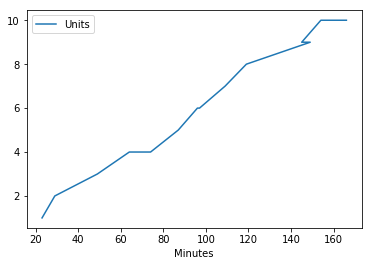

In [10]:
computer_data.plot("Minutes")

In [20]:
(est2 - computer_data["Minutes"]).mean()

-0.004285714285727644

In [19]:
(est3 - computer_data["Minutes"]).mean()

52.785714285714285

Best estimate in the absence of other information - mean

In [22]:
# New Quality metric based on the mean model
# wILL BE DEFINED SOONER OR lATER....

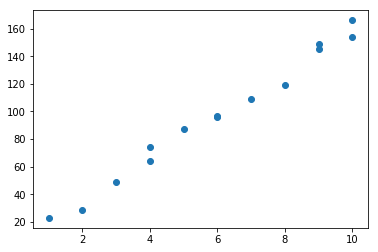

In [100]:
plt.scatter(computer_data["Units"],computer_data["Minutes"])

In [24]:
computer_data.corr()

,Units,Minutes
Units,1.000000,0.993699
Minutes,0.993699,1.000000


In [25]:
import numpy as np

In [28]:
r1= np.random.randn(2,4).ravel()

In [29]:
r1

array([ 1.26613659, -1.18213106,  0.44463641,  1.08424623,  0.37794201,
       -2.43003512, -0.2677542 , -0.23693542])

In [30]:
r2 = np.random.randn(2,4).ravel()

In [31]:
r2

array([ 2.18454124, -0.17545035,  1.09933811, -0.23308736, -0.54432905,
       -0.57607654, -0.20823064,  0.11694543])

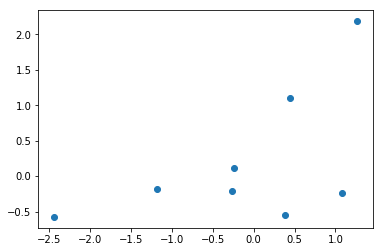

In [35]:
plt.scatter(r1,r2)

In [36]:
np.corrcoef(r1,r2)

array([[1.        , 0.56599035],
       [0.56599035, 1.        ]])

In [41]:
a = np.array([i for i in range(-100,100)])

In [46]:
b=(100*a*a)

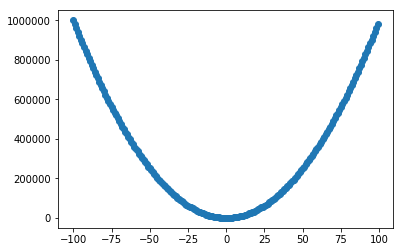

In [50]:
plt.scatter(a,b)

In [48]:
np.corrcoef(a,b)

array([[ 1.        , -0.01936225],
       [-0.01936225,  1.        ]])

In [51]:
# est_minutes = m*Units + c
m1 = 6
c1 = 10

m2 = 18
c2 = 8

m3 = 15
c3 = 7

In [56]:
computer_data["est1"] = m1*computer_data["Units"] + c1
computer_data["est2"] = m2*computer_data["Units"] + c2
computer_data["est3"] = m3*computer_data["Units"] + c3

In [57]:
computer_data


,Units,Minutes,est1,est2,est3
0,1,23,16,26,22
1,2,29,22,44,37
2,3,49,28,62,52
3,4,64,34,80,67
4,4,74,34,80,67
5,5,87,40,98,82
6,6,96,46,116,97
7,6,97,46,116,97
8,7,109,52,134,112
9,8,119,58,152,127


In [58]:
computer_data["error1"] = computer_data["est1"] - computer_data["Minutes"]
computer_data["error2"] = computer_data["est2"] - computer_data["Minutes"]
computer_data["error3"] = computer_data["est3"] - computer_data["Minutes"]

In [59]:
computer_data

,Units,Minutes,est1,est2,est3,error1,error2,error3
0,1,23,16,26,22,-7,3,-1
1,2,29,22,44,37,-7,15,8
2,3,49,28,62,52,-21,13,3
3,4,64,34,80,67,-30,16,3
4,4,74,34,80,67,-40,6,-7
5,5,87,40,98,82,-47,11,-5
6,6,96,46,116,97,-50,20,1
7,6,97,46,116,97,-51,19,0
8,7,109,52,134,112,-57,25,3
9,8,119,58,152,127,-61,33,8


In [60]:
# Average error when using est1(model1)
computer_data["error1"].mean()

-51.214285714285715

In [61]:
# Average error when using est2(model1)
computer_data["error2"].mean()

18.785714285714285

In [62]:
# Average error when using est3(model1)
computer_data["error3"].mean()

-0.21428571428571427

In [63]:
computer_data["mean_est"] = computer_data.Minutes.mean()

In [64]:
computer_data["error_mean"] = computer_data["mean_est"] -computer_data["Minutes"]

In [65]:
computer_data

,Units,Minutes,est1,est2,est3,error1,error2,error3,mean_est,error_mean
0,1,23,16,26,22,-7,3,-1,97.214286,74.214286
1,2,29,22,44,37,-7,15,8,97.214286,68.214286
2,3,49,28,62,52,-21,13,3,97.214286,48.214286
3,4,64,34,80,67,-30,16,3,97.214286,33.214286
4,4,74,34,80,67,-40,6,-7,97.214286,23.214286
5,5,87,40,98,82,-47,11,-5,97.214286,10.214286
6,6,96,46,116,97,-50,20,1,97.214286,1.214286
7,6,97,46,116,97,-51,19,0,97.214286,0.214286
8,7,109,52,134,112,-57,25,3,97.214286,-11.785714
9,8,119,58,152,127,-61,33,8,97.214286,-21.785714


In [66]:
computer_data["error_mean"].mean()

1.0150610510858574e-15

In [75]:
computer_data["error3_sq"] = computer_data["error3"]**2
computer_data["error_mean_sq"] = computer_data["error_mean"]**2

In [76]:
computer_data

,Units,Minutes,est1,est2,est3,error1,error2,error3,mean_est,error_mean,err3_sq,error3_sq,error_mean_sq
0,1,23,16,26,22,-7,3,-1,97.214286,74.214286,1,1,5507.760204
1,2,29,22,44,37,-7,15,8,97.214286,68.214286,64,64,4653.188776
2,3,49,28,62,52,-21,13,3,97.214286,48.214286,9,9,2324.617347
3,4,64,34,80,67,-30,16,3,97.214286,33.214286,9,9,1103.188776
4,4,74,34,80,67,-40,6,-7,97.214286,23.214286,49,49,538.903061
5,5,87,40,98,82,-47,11,-5,97.214286,10.214286,25,25,104.331633
6,6,96,46,116,97,-50,20,1,97.214286,1.214286,1,1,1.474490
7,6,97,46,116,97,-51,19,0,97.214286,0.214286,0,0,0.045918
8,7,109,52,134,112,-57,25,3,97.214286,-11.785714,9,9,138.903061
9,8,119,58,152,127,-61,33,8,97.214286,-21.785714,64,64,474.617347


In [77]:
computer_data["error3_sq"].sum(),computer_data["error_mean_sq"].sum()

(379, 27768.357142857145)

In [78]:
from sklearn.linear_model import LinearRegression

In [83]:
x =computer_data[["Units"]]
y = computer_data[["Minutes"]]
model = LinearRegression()


In [84]:
model.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
model.coef_,model.intercept_#m,c

(array([[15.50877193]]), array([4.16165414]))

In [90]:
m_best = model.coef_[0][0]
c_best = model.intercept_[0]

In [91]:
computer_data["best_est"] = m_best*computer_data["Units"] + c_best


In [92]:
computer_data

,Units,Minutes,est1,est2,est3,error1,error2,error3,mean_est,error_mean,err3_sq,error3_sq,error_mean_sq,best_est
0,1,23,16,26,22,-7,3,-1,97.214286,74.214286,1,1,5507.760204,19.670426
1,2,29,22,44,37,-7,15,8,97.214286,68.214286,64,64,4653.188776,35.179198
2,3,49,28,62,52,-21,13,3,97.214286,48.214286,9,9,2324.617347,50.687970
3,4,64,34,80,67,-30,16,3,97.214286,33.214286,9,9,1103.188776,66.196742
4,4,74,34,80,67,-40,6,-7,97.214286,23.214286,49,49,538.903061,66.196742
5,5,87,40,98,82,-47,11,-5,97.214286,10.214286,25,25,104.331633,81.705514
6,6,96,46,116,97,-50,20,1,97.214286,1.214286,1,1,1.474490,97.214286
7,6,97,46,116,97,-51,19,0,97.214286,0.214286,0,0,0.045918,97.214286
8,7,109,52,134,112,-57,25,3,97.214286,-11.785714,9,9,138.903061,112.723058
9,8,119,58,152,127,-61,33,8,97.214286,-21.785714,64,64,474.617347,128.231830


In [93]:
computer_data["error_best"] = computer_data["best_est"] - computer_data["Minutes"]

In [94]:
computer_data

,Units,Minutes,est1,est2,est3,error1,error2,error3,mean_est,error_mean,err3_sq,error3_sq,error_mean_sq,best_est,error_best
0,1,23,16,26,22,-7,3,-1,97.214286,74.214286,1,1,5507.760204,19.670426,-3.329574
1,2,29,22,44,37,-7,15,8,97.214286,68.214286,64,64,4653.188776,35.179198,6.179198
2,3,49,28,62,52,-21,13,3,97.214286,48.214286,9,9,2324.617347,50.687970,1.687970
3,4,64,34,80,67,-30,16,3,97.214286,33.214286,9,9,1103.188776,66.196742,2.196742
4,4,74,34,80,67,-40,6,-7,97.214286,23.214286,49,49,538.903061,66.196742,-7.803258
5,5,87,40,98,82,-47,11,-5,97.214286,10.214286,25,25,104.331633,81.705514,-5.294486
6,6,96,46,116,97,-50,20,1,97.214286,1.214286,1,1,1.474490,97.214286,1.214286
7,6,97,46,116,97,-51,19,0,97.214286,0.214286,0,0,0.045918,97.214286,0.214286
8,7,109,52,134,112,-57,25,3,97.214286,-11.785714,9,9,138.903061,112.723058,3.723058
9,8,119,58,152,127,-61,33,8,97.214286,-21.785714,64,64,474.617347,128.231830,9.231830


In [96]:
(computer_data["error_best"]**2).sum()

348.84837092731783

In [98]:
(computer_data["error3_sq"]).sum()

379

In [99]:
(computer_data["error_best"]**2).sum()

27768.357142857145

In [103]:
(computer_data["error_best"]**2).sum()/(computer_data["error_mean_sq"]).sum()

0.01256280193792639

In [105]:
SST  = (computer_data["error_mean_sq"]).sum()
SSE = (computer_data["error_best"]**2).sum()
SSE/SST

0.01256280193792639

In [106]:
1-(SSE/SST)

0.9874371980620736

In [107]:
(computer_data[["Units","Minutes"]].corr().iloc[1][0])**2

0.9874371980620733

In [108]:
Rsq = 1 - (SSE/SST)
# Tells how much reduction in error has been achived
# because of using  he model

In [121]:
model.predict([[10]])

array([[159.24937343]])